#### Image resizing to SROD pipeline Input

- Use this notebook to prepare all input images to 300x300 (512x512 later) as SROD Input
- Resized  300x300 HR is GT for DBPN+SSD300 SROD networks
- Downsized  75x75 LR is Input to DBPN+SSD300 SROD networks; it is to be SRed then to Detection
- Restored 300x300 RS is planned as LR image separately fed to SSD300 (use ssd/In300eval.py) for comparison
- Haven't settled with algorithm to produce RS-x4, BICUBIC is currently used, its more than a plain upscale
- May switch to linear upscale later

#### Use /4 or x4 for downscale and upscale by default


Populating the interactive namespace from numpy and matplotlib
/home/x/data/JPEGImages/000952.jpg


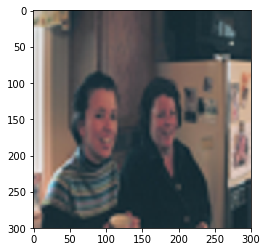

In [2]:
%pylab inline
from PIL import Image
from os import listdir
from os.path import isfile,join
import matplotlib.pyplot as plt

# These are my data folders, after done with files generation.
# Place VOC12 JPEGImages to image_dir location
# copy JPEGImages/*       to dataset/VOC12-HR
# copy JPEGImages-HR300/* to dataset/VOC12-HR300
# copy JPEGImages-LR-x4/* to dataset/VOC12-LR-x4

image_dir = "/home/x/data/JPEGImages"
image_hr_dir = "/home/x/data/JPEGImages-HR300"
image_target_dir = "/home/x/data/JPEGImages-LR-x4"
image_restor_dir = "/home/x/data/JPEGImages-RS-x4"

def scale_down(image_dir,image_hr_dir,image_target_dir,scale=4):
    for i, f in enumerate(listdir(image_dir)):
        if isfile(join(image_dir,f)):
            img = Image.open(join(image_dir,f))
            img = img.resize((300,300), Image.ANTIALIAS)         # LANCZOS ?
            img.save(join(image_hr_dir,f),"JPEG",quality=90)     # quality=99 ?
            img = img.resize((75,75),Image.BICUBIC)              # what is best 75x75 downsizing
            img.save(join(image_target_dir,f),"JPEG",quality=90) # 99?
            img = img.resize((300,300),Image.BICUBIC)            # BICUBIC too good here ?
            img.save(join(image_restor_dir,f),"JPEG",quality=90)
           
            if i == 0:
                print(join(image_dir,f))
                plt.imshow(img)
                plt.show()
            img.close()

scale_down(image_dir,image_hr_dir,image_target_dir)